In [1]:
import onnxruntime as rt
from sklearn.metrics import accuracy_score
from scipy.stats import wilcoxon
import pandas as pd
import numpy as np
from testing import *
from goodModel import drop_personality_columns,drop_taaleis_columns


/var/folders/hz/8qhn2dwn2zs419cpd7l0w6q40000gn/T/ipykernel_95190/3613560875.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


315
20
37
23
26


In [2]:
# First we load the models and the data 
data = pd.read_csv('data/investigation_train_large_checked.csv')
y = data['checked']
X = data.drop(['checked', 'Ja', 'Nee'], axis=1)
X = X.astype(np.float32)


df = pd.read_csv('data/investigation_train_large_checked.csv')

def modify_data(df):
    print("Starting data augmentation")

    df = drop_personality_columns(df)
    print("Data augmentation dropping personality columns complete")
    df = drop_taaleis_columns(df)
    print("Data augmentation dropping taaleis complete")
    return df
data2 = modify_data(df)

# Let's specify the features and the target
y2 = data2['checked']
X2 = data2.drop(['checked', 'Ja', 'Nee'], axis=1)
X2 = X2.astype(np.float32)


model1 = rt.InferenceSession("model/model_1.onnx")
model2 = rt.InferenceSession("model/model_2.onnx")


Starting data augmentation
Data augmentation dropping personality columns complete
Data augmentation dropping taaleis complete


# Mutation testing

In [3]:
mutationTestResults_1 = mutationTest(model1,X,y,10)
mutationTestResults_2 = mutationTest(model2,X2,y2,10)
compareAccuracies(mutationTestResults_1,mutationTestResults_2)


Run 1/10
Initial accuracy: 0.8871 for model
Model Accuracy altered: 0.4990

Run 2/10
Initial accuracy: 0.8838 for model
Model Accuracy altered: 0.4996

Run 3/10
Initial accuracy: 0.8857 for model
Model Accuracy altered: 0.4970

Run 4/10
Initial accuracy: 0.8887 for model
Model Accuracy altered: 0.4972

Run 5/10
Initial accuracy: 0.8858 for model
Model Accuracy altered: 0.4986

Run 6/10
Initial accuracy: 0.8871 for model
Model Accuracy altered: 0.5021

Run 7/10
Initial accuracy: 0.8868 for model
Model Accuracy altered: 0.4994

Run 8/10
Initial accuracy: 0.8909 for model
Model Accuracy altered: 0.4966

Run 9/10
Initial accuracy: 0.8852 for model
Model Accuracy altered: 0.5003

Run 10/10
Initial accuracy: 0.8868 for model
Model Accuracy altered: 0.5023

Run 1/10
Initial accuracy: 0.9873 for model
Model Accuracy altered: 0.7208

Run 2/10
Initial accuracy: 0.9877 for model
Model Accuracy altered: 0.7145

Run 3/10
Initial accuracy: 0.9866 for model
Model Accuracy altered: 0.7168

Run 4/10
I

In [5]:
# Wilcoxon Test
stat, p_value = wilcoxon(mutationTestResults_1['model'], mutationTestResults_1['model_mutated'])
print("\nWilcoxon Test Results for Model 1:")
print(f"Statistic: {stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in performance between original and mutated models.")
else:
    print("No significant difference in performance between original and mutated models.")

 # Wilcoxon Test
stat, p_value = wilcoxon(mutationTestResults_2['model'], mutationTestResults_2['model_mutated'])
print("\nWilcoxon Test Results for Model 2:")
print(f"Statistic: {stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in performance between original and mutated models.")
else:
    print("No significant difference in performance between original and mutated models.")


Wilcoxon Test Results for Model 1:
Statistic: 0.0000, P-value: 0.0020
Significant difference in performance between original and mutated models.

Wilcoxon Test Results for Model 2:
Statistic: 0.0000, P-value: 0.0020
Significant difference in performance between original and mutated models.


# Differentiation Testing


In [4]:
features_to_modify = ['contacten_soort_document__uitgaand_' , 'afspraak_aantal_woorden' ,'persoon_leeftijd_bij_onderzoek','relatie_kind_leeftijd_verschil_ouder_eerste_kind']

metrics = differentiationTesting(model1,X,y,0.2,features_to_modify,10)
metrics2 = differentiationTesting(model2,X2,y2,0.2,features_to_modify,10)
print_average_metrics(metrics,metrics2)


Run 1/10

Run 2/10

Run 3/10

Run 4/10

Run 5/10

Run 6/10

Run 7/10

Run 8/10

Run 9/10

Run 10/10

Run 1/10

Run 2/10

Run 3/10

Run 4/10

Run 5/10

Run 6/10

Run 7/10

Run 8/10

Run 9/10

Run 10/10
Average Metrics Across Runs:

Model 1:
accuracy_before: 0.89
accuracy_after: 0.87
tp_before: 992.10
tp_after: 1126.90
fp_before: 53.90
fp_after: 525.10
tn_before: 22064.80
tn_after: 21593.60
fn_before: 2889.20
fn_after: 2754.40

Model 2:
accuracy_before: 0.99
accuracy_after: 0.99
tp_before: 3556.30
tp_after: 3552.30
fp_before: 5.90
fp_after: 7.00
tn_before: 22112.80
tn_after: 22111.70
fn_before: 325.00
fn_after: 329.00


# Equivalence partitioning 

In [3]:
print("Top 5 worst performing features for model 1: ")
model1_results = calculateEPHighestDifference(data,model1)
print(model1_results)


print("Top 5 worst performing features for model 2: ")
model2_results = calculateEPHighestDifference(data2,model2)
print(model2_results)



Top 5 worst performing features for model 1: 
                                 feature  accuracy_difference  \
135  contacten_onderwerp_inname_aanvraag             0.556843   
93      contacten_onderwerp__werk_intake             0.410047   
80                     competentie_leren             0.389976   
171       contacten_soort_rapportage_rib             0.272487   
163               contacten_soort_anders             0.270833   

                                            accuracies  
135  [0.8901767521205516, 0.867576178416796, 0.3333...  
93   [0.9100470957613814, 0.8725092660056388, 0.797...  
80       [0.8899758388286374, 0.8634810571801829, 0.5]  
171  [0.9015412885322133, 0.8685774256489092, 0.922...  
163  [0.8685968015595105, 0.891636807654583, 0.8493...  
Top 5 worst performing features for model 2: 
                                               feature  accuracy_difference  \
170             contacten_soort_telefoontje__uitgaand_             0.105417   
160              


Run 1

Run 1


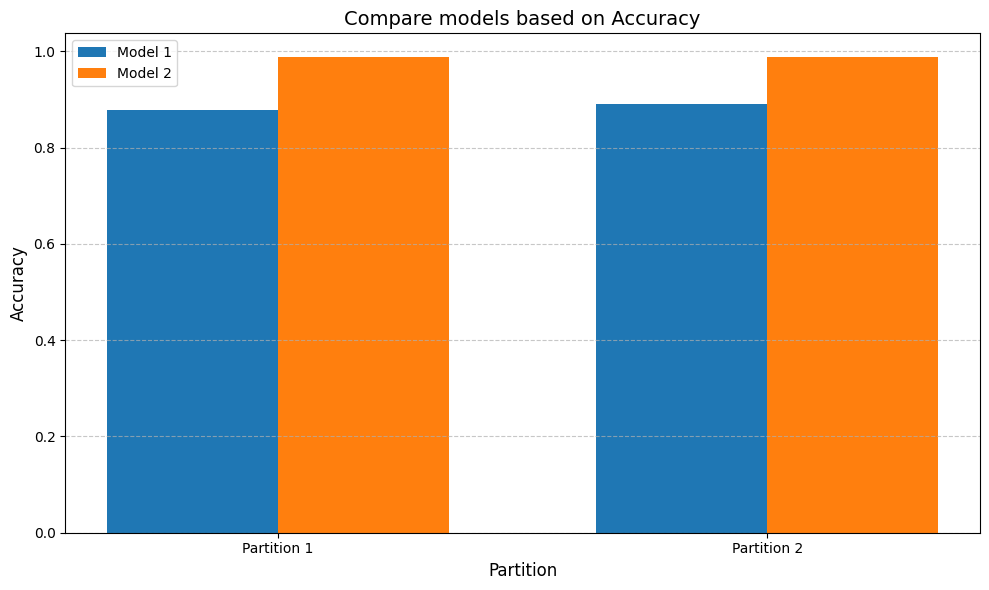

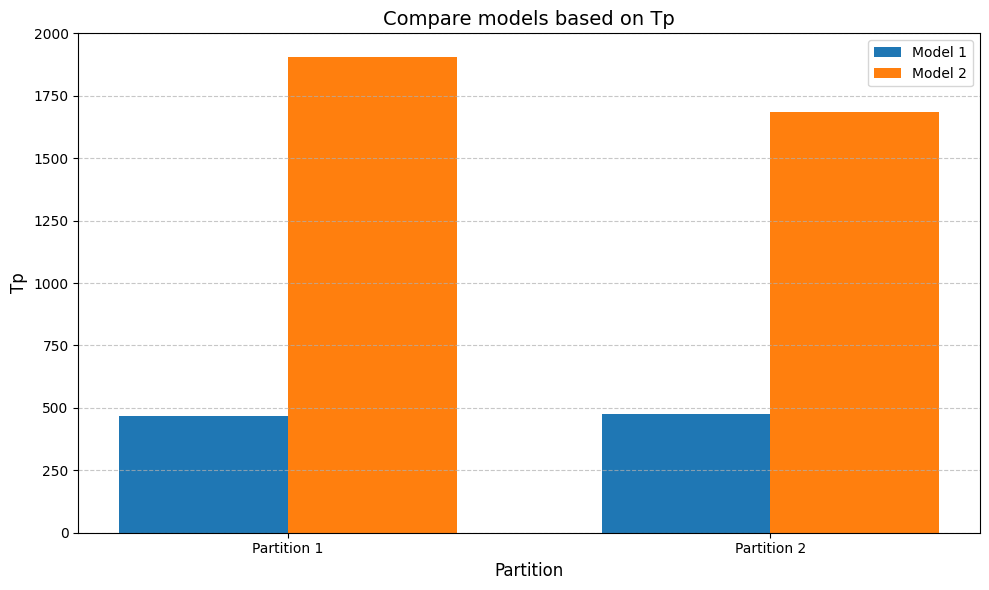

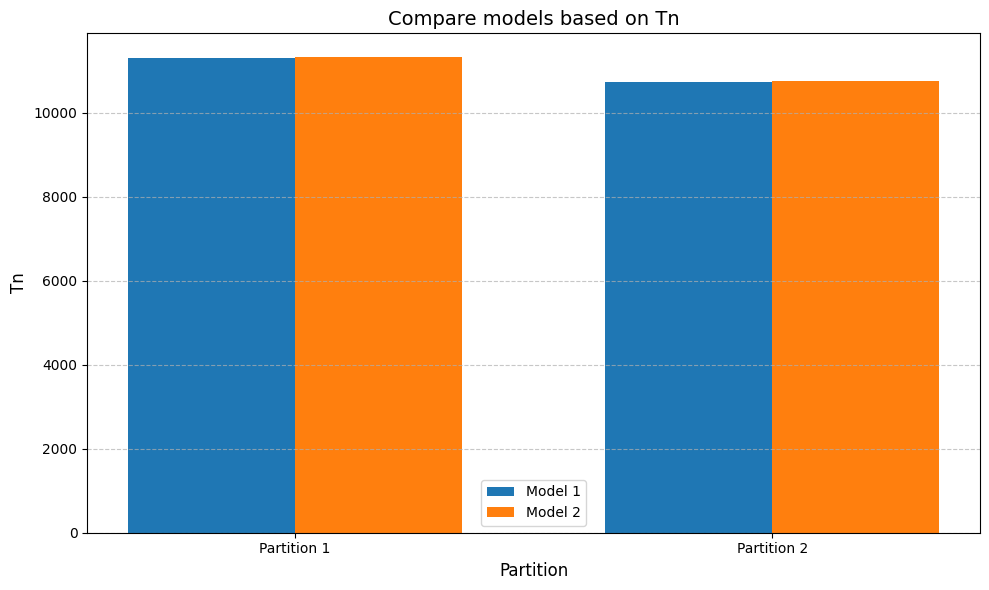

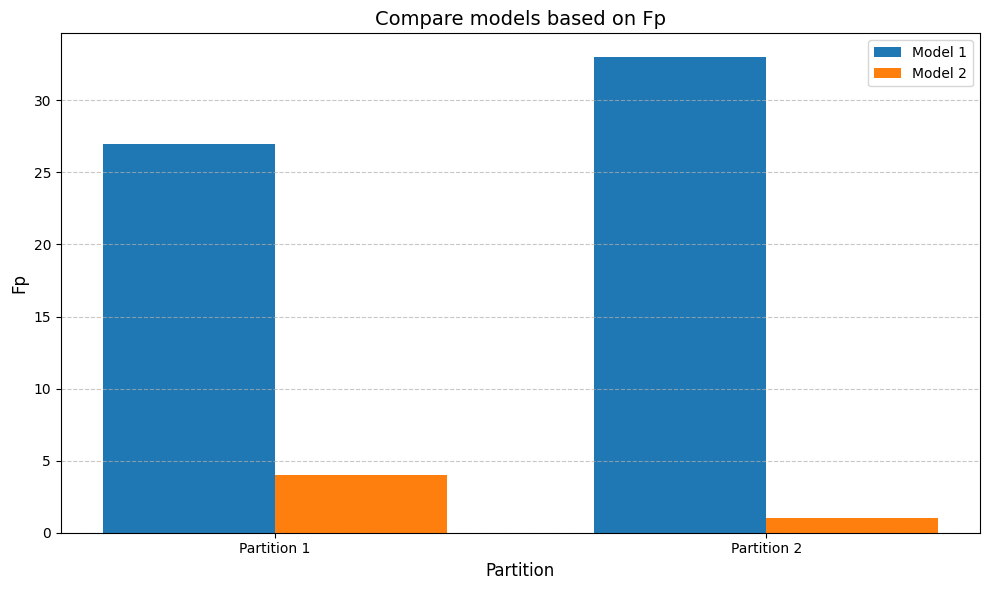

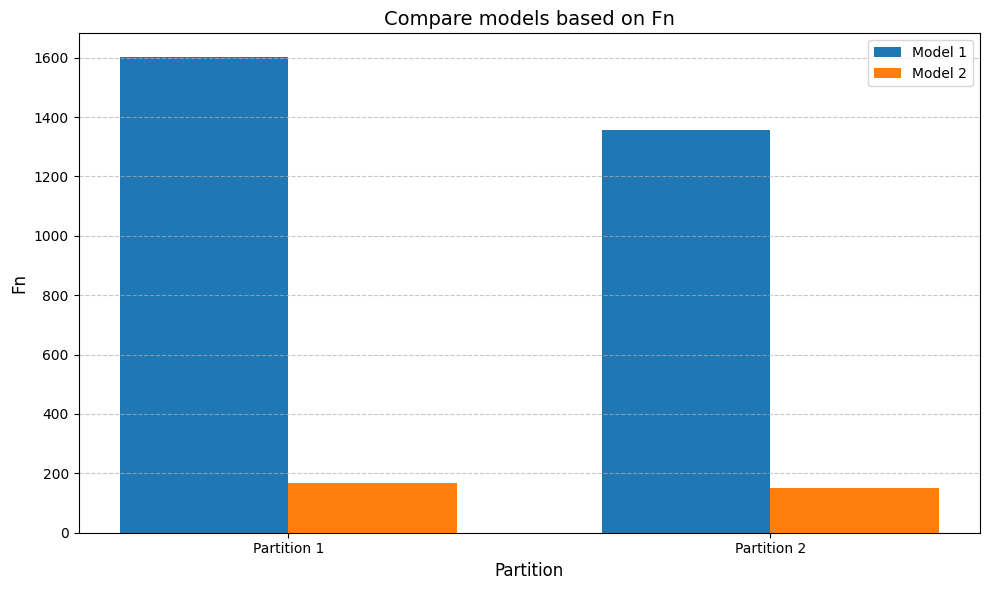

In [3]:
gender_partitions = [
    {"name": "Man", "condition": lambda df: df['persoon_geslacht_vrouw'] < 1},
    {"name": "Woman", "condition": lambda df: (df['persoon_geslacht_vrouw'] >= 1)}
    
]

EPResults = equivalencePartitioning(model1,X,y,gender_partitions,1)
EPResults2 = equivalencePartitioning(model2,X2,y2,gender_partitions,1)

plot_EP_results(EPResults, EPResults2, 'accuracy')
plot_EP_results(EPResults, EPResults2, 'tp')
plot_EP_results(EPResults, EPResults2, 'tn')
plot_EP_results(EPResults, EPResults2, 'fp')
plot_EP_results(EPResults, EPResults2, 'fn')